In [3]:
import sys
import numpy as np
import pyAgrum as gum
%matplotlib inline
from pyAgrum.lib.bn2roc import showROC

In [4]:
bn=gum.loadBN("../resources/alarm.dsl")

In [6]:
# generateCSV from a BN 
import pyAgrum.lib.bn2csv as bn2csv
bn2csv.generateCSV(bn,"learn.csv",10000,True)
bn2csv.generateCSV(bn,"train.csv",1000,True)

 learn.csv : [ ############################################################### ] 100%
Log2-Likelihood : -152199.16816902484

 train.csv : [ ############################################################### ] 100%
Log2-Likelihood : -14982.33027593964



-14982.33027593964

In [7]:
# Learning a BN from the database
learner=gum.BNLearner("train.csv")

# # Hill-Climbing
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
bn2.setProperty("name","Learned_{0}s".format(learner.currentTime()))

In [8]:
print(bn2.names())

['ANAPHYLAXIS', 'TPR', 'DISCONNECT', 'LVFAILURE', 'HISTORY', 'FIO2', 'ERRCAUTER', 'ERRLOWOUTPUT', 'INSUFFANESTH', 'PULMEMBOLUS', 'PAP', 'MINVOLSET', 'VENTMACH', 'VENTTUBE', 'INTUBATION', 'SHUNT', 'HYPOVOLEMIA', 'STROKEVOLUME', 'LVEDVOLUME', 'PCWP', 'CVP', 'KINKEDTUBE', 'VENTLUNG', 'MINVOL', 'VENTALV', 'ARTCO2', 'EXPCO2', 'PVSAT', 'SAO2', 'CATECHOL', 'HR', 'CO', 'BP', 'HRSAT', 'HREKG', 'HRBP', 'PRESS']


In [14]:
print(bn2.variableFromName("SHUNT"))

SHUNT<0,1>


 train.csv : [ ############################################################### ] 100%
 result in roc_Learned_0.180889s-train.csv-SHUNT-1.png


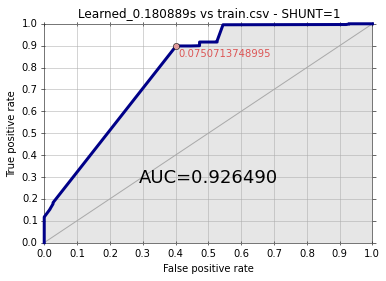

In [15]:
showROC(bn2,"train.csv",'SHUNT',"1",True,True) 